# Reto Coppel


## Importación de librerías

In [169]:
from pyspark.sql import SparkSession

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import multiprocessing as mp

## Carga de datos

In [125]:
df = pd.read_csv("../dataset.csv")

In [126]:
df.columns = df.columns.str.capitalize()

## Inspección

In [127]:
df.head(5)

,Unnamed: 0,Fecha,Segmento,Hora_llegada,Hora_llamado,Hora_salida,Caja,Tienda,Status,Estado
0,821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México
1,821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México
2,821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México
3,821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México
4,821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México


In [128]:
df.count(), len(df.columns)

(Unnamed: 0      18510772
 Fecha           18510772
 Segmento        18510772
 Hora_llegada    18510772
 Hora_llamado    18510772
 Hora_salida     18510772
 Caja            18510772
 Tienda          18510772
 Status          18510772
 Estado          18510772
 dtype: int64,
 10)

### Tipos de datos

In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510772 entries, 0 to 18510771
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   Fecha         object 
 2   Segmento      object 
 3   Hora_llegada  float64
 4   Hora_llamado  float64
 5   Hora_salida   float64
 6   Caja          object 
 7   Tienda        object 
 8   Status        object 
 9   Estado        object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.4+ GB
None


El tipo de dato de cada atributo corresponde a la naturaleza del atributo.

### Valores nulos

In [130]:
null_counts = df.isnull().sum()

No hay valores nulos.

### Valores únicos

In [131]:
unique_values_list = df["Segmento"].drop_duplicates().tolist()
print(unique_values_list)

['retail', 'banco', 'afiliacion']


Hay tres tipos de segmento que corresponden a los siguientes tipos: \
Banco: Bancoppel \
Retail: Coppel \
Afiliación: Promotoría

In [132]:
print(df["Caja"].unique())

['caja_a' 'caja_b' 'caja_c' 'caja_d' 'caja_e' 'caja_f' 'caja_j' 'caja_h'
 'caja_i' 'caja_k' 'ventanilla_a' 'ventanilla_b' 'caja_l' 'ventanilla_c'
 'ventanilla_d' 'caja_m' 'p_a' 'ventanilla_e' 'ventanilla_f' 'caja_n'
 'p_b' 'p_c' 'caja_o' 'p_d' 'p_e' 'caja_p' 'caja_q' 'p_f' 'p_g' 'p_h'
 'p_i' 'p_j' 'p_k' 'p_l' 'p_m' 'p_n' 'ventanilla_g' 'p_o' 'p_p' 'a_a'
 'a_b' 'p_q' 'p_r' 'p_s' 'caja_r' 'caja_s' 'caja_t' 'caja_u' 'caja_v'
 'Caja_a' 'ventanilla_h' 'p_t' 'Caja_b' 'p_u' 'ventanilla_i' 'Caja_c'
 'Caja_d' 'Caja_e' 'p_v' 'p_y' 'ventanilla_j' 'Caja_f' 'ventanilla_k'
 'ventanilla_l' 'ventanilla_m' 'ventanilla_n' 'ventanilla_o'
 'ventanilla_p' 'ventanilla_q' 'p_z' 'P_a' 'P_b' 'ventanilla_r'
 'ventanilla_s' 'P_c' 'caja_x' 'P_d']


Se tienen 77 cajas distintas que se dividen en tres tipos: caja, ventanilla, p. Hay errores de etiquetado.

In [133]:
result = df.groupby(["Segmento", "Caja"]).agg(Cajas_distintas=("Caja", "nunique"))
result

Cajas_distintas
Segmento   Caja                         
afiliacion P_a                         1
           P_b                         1
           P_c                         1
           P_d                         1
           caja_a                      1
...                                  ...
retail     ventanilla_n                1
           ventanilla_o                1
           ventanilla_p                1
           ventanilla_r                1
           ventanilla_s                1

[211 rows x 1 columns]

Cada segmento tiene diferentes cajas.

In [134]:
df.groupby("Segmento").agg(Cajas_distintas=("Caja", "nunique"))

,Cajas_distintas
Segmento,
afiliacion,62
banco,75
retail,74


In [135]:
df["Tienda"].drop_duplicates()


0          Tienda_A
31         Tienda_B
456        Tienda_C
477        Tienda_D
486        Tienda_E
515        Tienda_F
518        Tienda_G
528        Tienda_H
557        Tienda_I
605        Tienda_J
620        Tienda_K
750        Tienda_L
803        Tienda_M
807        Tienda_N
822        Tienda_O
860        Tienda_P
892        Tienda_Q
928        Tienda_R
937        Tienda_S
1103       Tienda_T
1106       Tienda_U
1366       Tienda_V
1426       Tienda_X
1477       Tienda_Y
1484       Tienda_Z
1517      Tienda_AA
1530      Tienda_AB
1557      Tienda_AC
1577      Tienda_AD
1584      Tienda_AE
1650      Tienda_AF
1770      Tienda_AG
6825      Tienda_AH
25778     Tienda_AI
62808     Tienda_AJ
79097     Tienda_AK
228222    Tienda_AL
230763    Tienda_AM
238806    Tienda_AN
248544    Tienda_AO
253655    Tienda_AP
276210    Tienda_AQ
540158    Tienda_AX
725127    Tienda_AY
725347    Tienda_AZ
751673    Tienda_BA
945824    Tienda_BB
951509    Tienda_BC
985249    Tienda_BD
996581    Tienda_BE


Se tienen 50 tiendas distintas.

In [136]:
df["Status"].drop_duplicates()

0     Atendido
79     Ausente
Name: Status, dtype: object

In [137]:
df["Estado"].drop_duplicates()

0                        Ciudad de México
31                           Quintana Roo
456                                Sonora
477                               Sinaloa
518       Veracruz de Ignacio de la Llave
557                               Chiapas
605                                Puebla
620                               Tabasco
750                               Durango
803                               Yucatán
807                            Guanajuato
822                             Chihuahua
937                             Zacatecas
1103                               México
1366                            Querétaro
1426                               Oaxaca
1477                              Morelos
1484                           Nuevo León
1584                  Michoacán de Ocampo
1770                             Guerrero
6825                      Baja California
79097                 Baja California Sur
248544               Coahuila de Zaragoza
Name: Estado, dtype: object

Se incluyen solo 23 estados de la república.

Hay errores de etiquetado en el atributo *Caja*.

## Limpieza de datos

### Errores de etiquetado

Corrijamos errores de etiquetado, en este caso, cambiemos todos los valores del atributo *Caja* a minusculas para que no haya valores repetidos que se identifiquen como distintos por el uso de mayusculas.

In [138]:
df["Caja"] = df["Caja"].str.lower()

df["Caja"].drop_duplicates()

0                 caja_a
2                 caja_b
4                 caja_c
9                 caja_d
11                caja_e
                ...     
4806790     ventanilla_q
4883794              p_z
6462801     ventanilla_r
6516362     ventanilla_s
10033148          caja_x
Name: Caja, Length: 67, dtype: object

Cambios a minusculas los valores de los demas atributos para ser consistentes con los etiquetados.

In [139]:
df["Status"] = df["Status"].str.lower()
df["Status"].drop_duplicates()

0     atendido
79     ausente
Name: Status, dtype: object

### Ruido

Eliminemos las observaciones donde la hora de llegada es mayor que la hora de llamado o salida y las observaciones donde su hora de llamado es mayor al horario de salida

In [140]:
df = df[
    (df["Hora_llegada"] < df["Hora_llamado"]) &
    (df["Hora_llegada"] < df["Hora_salida"]) &
    (df["Hora_llamado"] < df["Hora_salida"])
]

print((len(df), len(df)))

(18100185, 18100185)


Se eliminaron 400,000 observaciones, aproximadamente.

## Creación de nuevas columnas

Separemos el atributo compuesto *Fecha* en tres atributos: *Dia*, *Mes* y *Anio*.

In [141]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

df["Anio"] = df["Fecha"].dt.year
df["Mes"] = df["Fecha"].dt.month
df["Dia"] = df["Fecha"].dt.day

print(df.head(5))

   Unnamed: 0      Fecha Segmento  Hora_llegada  Hora_llamado  Hora_salida  \
0      821243 2023-01-01   retail      0.503465      0.503477     0.503581   
1      821244 2023-01-01   retail      0.503581      0.503616     0.511174   
2      821245 2023-01-01   retail      0.503789      0.503801     0.505120   
3      821246 2023-01-01   retail      0.503847      0.505132     0.509333   
4      821247 2023-01-01   retail      0.503894      0.508072     0.509981   

     Caja    Tienda    Status            Estado  Anio  Mes  Dia  
0  caja_a  Tienda_A  atendido  Ciudad de México  2023    1    1  
1  caja_a  Tienda_A  atendido  Ciudad de México  2023    1    1  
2  caja_b  Tienda_A  atendido  Ciudad de México  2023    1    1  
3  caja_b  Tienda_A  atendido  Ciudad de México  2023    1    1  
4  caja_c  Tienda_A  atendido  Ciudad de México  2023    1    1  


In [142]:
df["Anio"].drop_duplicates()

0           2023
17088307    2024
Name: Anio, dtype: int32

In [143]:
df["Mes"].drop_duplicates()

0            1
933290       2
2056131      3
3445909      4
4758746      5
6295198      6
7813825      7
9450023      8
11020752     9
12556625    10
14044304    11
15502996    12
Name: Mes, dtype: int32

In [144]:
df["Dia"].drop_duplicates().sort_values()

0          1
456        2
23221      3
50455      4
76812      5
102085     6
126956     7
157073     8
178296     9
209476    10
227941    11
248063    12
271926    13
305099    14
349533    15
382243    16
432074    17
469478    18
497592    19
528282    20
559943    21
599654    22
627608    23
664797    24
695006    25
722066    26
748340    27
781283    28
825603    29
858646    30
898896    31
Name: Dia, dtype: int32

In [145]:
df["Dia_semana"] = df["Fecha"].dt.weekday
df.head(5)

,Unnamed: 0,Fecha,Segmento,Hora_llegada,Hora_llamado,Hora_salida,Caja,Tienda,Status,Estado,Anio,Mes,Dia,Dia_semana
0,821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,atendido,Ciudad de México,2023,1,1,6
1,821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,atendido,Ciudad de México,2023,1,1,6
2,821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,atendido,Ciudad de México,2023,1,1,6
3,821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,atendido,Ciudad de México,2023,1,1,6
4,821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,atendido,Ciudad de México,2023,1,1,6


In [146]:
df["Dia_semana"].drop_duplicates().sort_values()

456       0
23221     1
50455     2
76812     3
102085    4
126956    5
0         6
Name: Dia_semana, dtype: int32

Creemos una nueva columna que sea la diferencia de los atributos *Hora_llamado* y *Hora_llegada* para su posterior análisis.

In [147]:
df["Tiempo_espera"] = df["Hora_llamado"] - df["Hora_llegada"]

print(df.head(5))

   Unnamed: 0      Fecha Segmento  Hora_llegada  Hora_llamado  Hora_salida  \
0      821243 2023-01-01   retail      0.503465      0.503477     0.503581   
1      821244 2023-01-01   retail      0.503581      0.503616     0.511174   
2      821245 2023-01-01   retail      0.503789      0.503801     0.505120   
3      821246 2023-01-01   retail      0.503847      0.505132     0.509333   
4      821247 2023-01-01   retail      0.503894      0.508072     0.509981   

     Caja    Tienda    Status            Estado  Anio  Mes  Dia  Dia_semana  \
0  caja_a  Tienda_A  atendido  Ciudad de México  2023    1    1           6   
1  caja_a  Tienda_A  atendido  Ciudad de México  2023    1    1           6   
2  caja_b  Tienda_A  atendido  Ciudad de México  2023    1    1           6   
3  caja_b  Tienda_A  atendido  Ciudad de México  2023    1    1           6   
4  caja_c  Tienda_A  atendido  Ciudad de México  2023    1    1           6   

   Tiempo_espera  
0       0.000012  
1       0.000035  

## Análisis exploratorio de datos

In [148]:
datos_por_tienda = dict()
count = 0
for tienda in df.Tienda.unique():
    if count > 3:
        break
    datos_por_tienda[tienda] = df[df.Tienda == tienda]
    count += 1

Dejamos de lado el atributo *Estado*, ya que no sería necesario si analizaremos los datos por tienda.

In [149]:
def EDA(datos_por_tienda):
    for tienda, conjunto_datos in datos_por_tienda.items():
        print(tienda)
        print("Tiempos de espera")
        conjunto_datos.describe()
        plt.hist(conjunto_datos.Tiempo_espera)
        plt.show()
        print("Tiempos de espera por status")
        atendido = conjunto_datos.loc[conjunto_datos.Status == "atendido", "Tiempo_espera"]
        ausente = conjunto_datos.loc[conjunto_datos.Status == "ausente", "Tiempo_espera"]
        atendido.describe()
        ausente.describe()


## Análisis exploratorio de datos

### Clientes por mes

**Descripción numérica**

In [150]:
clientes_por_mes = df.groupby("Mes").size().reset_index(name="Clientes")

print(clientes_por_mes.head(12))

    Mes  Clientes
0     1   2302042
1     2   1095886
2     3   1355283
3     4   1280674
4     5   1500560
5     6   1483479
6     7   1604371
7     8   1538614
8     9   1501441
9    10   1454802
10   11   1427802
11   12   1555231


**Descripción gráfica**

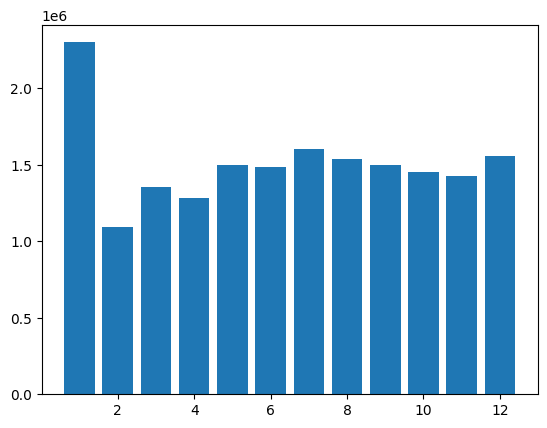

In [151]:
plt.bar(clientes_por_mes.Mes, clientes_por_mes.Clientes)
plt.show()

Podemos observar que el mes en el que entran más clientes es enero, le sigue julio y diciembre.

### Clientes atendidos y ausentes por mes

**Descripción numérica**

In [152]:
ausentes_por_mes = df.groupby(["Mes", "Status"]).size().reset_index(name="Clientes")

ausentes_por_mes.head(24)

,Mes,Status,Clientes
0,1,atendido,2153427
1,1,ausente,148615
2,2,atendido,1028735
3,2,ausente,67151
4,3,atendido,1268685
5,3,ausente,86598
6,4,atendido,1200700
7,4,ausente,79974
8,5,atendido,1401754
9,5,ausente,98806


### Tiempo de espera

**Descripción numérica**

In [153]:
df["Tiempo_espera"].describe()

count    1.810018e+07
mean     5.099835e-03
std      1.133006e-02
min      1.157407e-05
25%      3.356481e-04
50%      1.805556e-03
75%      5.324074e-03
max      5.003819e-01
Name: Tiempo_espera, dtype: float64

In [154]:
df["Tiempo_espera"].quantile([0.25, 0.5, 0.75])

0.25    0.000336
0.50    0.001806
0.75    0.005324
Name: Tiempo_espera, dtype: float64

Podemos notar una asimetría a la derecha.

**Descripción gráfica**

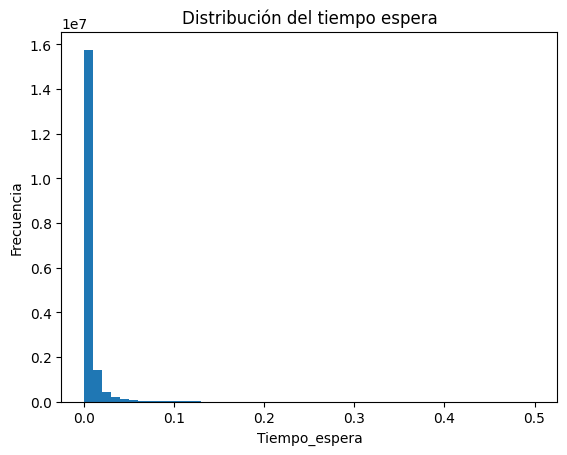

In [155]:
plt.hist(df.Tiempo_espera, bins=50)
plt.title("Distribución del tiempo espera")
plt.xlabel("Tiempo_espera")
plt.ylabel("Frecuencia")
plt.show()

### Tiempo de espera de clientes atendidos y ausentes

### Tiempo de espera promedio por mes

In [156]:
espera_prom_mes = df.groupby("Mes")["Tiempo_espera"].mean()

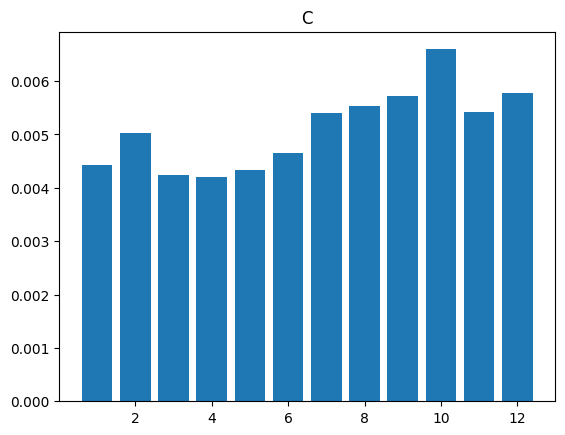

In [157]:
plt.bar(df.Mes.unique(), espera_prom_mes)
plt.title("C")
plt.show()

A pesar de que en el mes de enero entran más clientes a las tiendas, los tiempos son menores que los de los demás meses, por lo que es probable que se tenga más personal en este mes.

## Prueba hipótesis

Antes que nada, a pesar de que parezca obvio, sería buena práctica analizar si realmente existe una diferencia entre los tiempos de espera de clientes que fueron atendidos con los que se fueron antes de ser atendidos. Para esto usaremos prueba de permutación para diferencia de medias.

In [158]:
df["Tiempo_espera"] = 1000 * df["Tiempo_espera"]

H0: mu2 - mu1 = 0 \
H1: mu2 - mu1 != 0

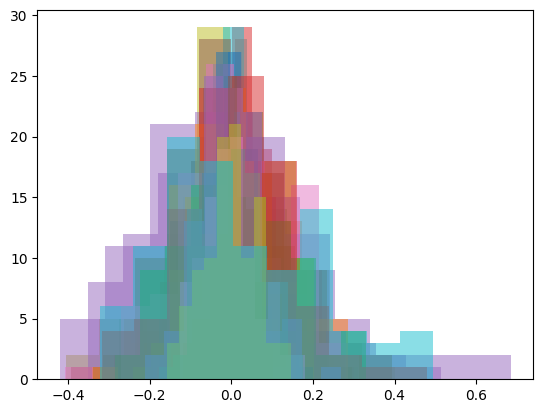

In [159]:
p_values = []

for tienda in df["Tienda"].unique():
    aux = df[df["Tienda"] == tienda]

    # Valor observadoa
    obs = (aux[aux["Status"] == "ausente"]["Tiempo_espera"].mean() -
           aux[aux["Status"] == "atendido"]["Tiempo_espera"].mean())

    B = 100
    atendidos = aux[aux["Status"] == "atendido"]
    ausente = aux[aux["Status"] == "ausente"]
    diferencias_medias = []

    for _ in range(B):
        etiquetas = np.random.permutation(aux["Status"])
        diferencias_medias.append(aux[etiquetas == "ausente"]["Tiempo_espera"].mean() -
                                  aux[etiquetas == "atendido"]["Tiempo_espera"].mean())

    p_values.append(np.sum(diferencias_medias >= obs))

    plt.hist(diferencias_medias, alpha=0.5)

plt.show()



In [160]:
p_values

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

Tenemos evidencia muy fuerte en contra de la hipotesis nula, es decir, tenemos suficiente evidencia estadística para creer que, en promedio, las personas que se ausentaron esperaron más que las personas que fueron atendidas.

## Estimación de parametros

Sabiendo que las personas abandonan la tienda, en efecto, por los largos tiempos de espera. Podemos entonces estimar parámetros. Previo a esto necesitamos asegurarnos sobre cual es la distribución con la que estamos tratando. Viendo la gráfica, podemos ver que la distribución de los datos se asemeja a la de una distribución exponencial. Vamos entonces a hacer una prueba de ji^2 para corroborar esta hipótesis.

In [161]:
# 1. Estimación del parámetro lambda de la distribución exponencial
lambda_est = 1 / df['Tiempo_espera'].mean()
print(f"Parámetro lambda estimado: {lambda_est}")

# 2. Prueba de Kolmogorov-Smirnov
# Comparar los datos con una distribución exponencial teórica
ks_stat, ks_pvalue = stats.kstest(df['Tiempo_espera'], 'expon', args=(0, 1/lambda_est))
print(f"Prueba de Kolmogorov-Smirnov: Estadístico = {ks_stat}, p-valor = {ks_pvalue}")

# 3. Interpretación del resultado
nivel_significancia = 0.05
if ks_pvalue > nivel_significancia:
    print(f"No se rechaza la hipótesis nula: Los datos parecen seguir una distribución exponencial (p-valor = {ks_pvalue})")
else:
    print(f"Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución exponencial (p-valor = {ks_pvalue})")


Parámetro lambda estimado: 0.19608479287486585
Prueba de Kolmogorov-Smirnov: Estadístico = 0.20829886940974873, p-valor = 0.0
Se rechaza la hipótesis nula: Los datos NO parecen seguir una distribución exponencial (p-valor = 0.0)


Viendo que los datos en efecto vienen de una distribución exponencial. Podemos entonces estimar la mediana del tiempo de espera de los clientes para cada tienda en cada día de la semana. Esto se hace por que factores como estado, localidad y población son contribuyentes a la cantidad de gente en cada tienda. Por lo tanto no se pueden analizar a todas las tiendas como conjunto. Igualmente sabemos que hay unos días de la semana que son más ocupados que otros. De esta manera podemos tratar al sistema de gente en fila como un proceso Poisson no-homogéneo tomando lambda en función del dia de la semana. No se usan dias del mes debido a que sólo hay dos observaciones por dia por tienda (2023 y 2024)

In [168]:
lambdas_est_banco = {}
df_banco = df[df["Segmento"] == "banco"]

lambdas_est_afiliacion = {}
df_afiliacion = df[df["Segmento"] == "afiliacion"]

lambdas_est_retail = {}
df_retail = df[df["Segmento"] == "retail"]

In [ ]:
# Corremos en paralelo para mejorar tiempo de ejecución

def extraer_lambdas(df, dict):
    for tienda in df['Tienda'].unique():
        dict[tienda] = [1/df[(df["Tienda"] == tienda) & (df["Dia_semana"] == dia)]['Tiempo_espera'].median() for dia in df['Dia_semana']]

    return dict

pool = mp.Pool()

lambdas_est_banco, lambdas_est_afiliacion, lambdas_est_retail = pool.map(extraer_lambdas, [[df_banco, lambdas_est_banco], [df_afiliacion, lambdas_est_afiliacion], [df_retail, lambdas_est_retail]])

pool.close()
pool.join()